In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/BERT/formatted_jsonfile_new.json'


**Loading the JSON Data**

In [3]:
import pandas as pd
import json

with open('/content/drive/My Drive/BERT/formatted_jsonfile_new.json', 'r') as file:
    data = json.load(file)

df = pd.json_normalize(data)
df.head()


,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


**EDA**

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")



**Distribution of Complaints by Product**

<ipython-input-43-f6721bd3f439>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")


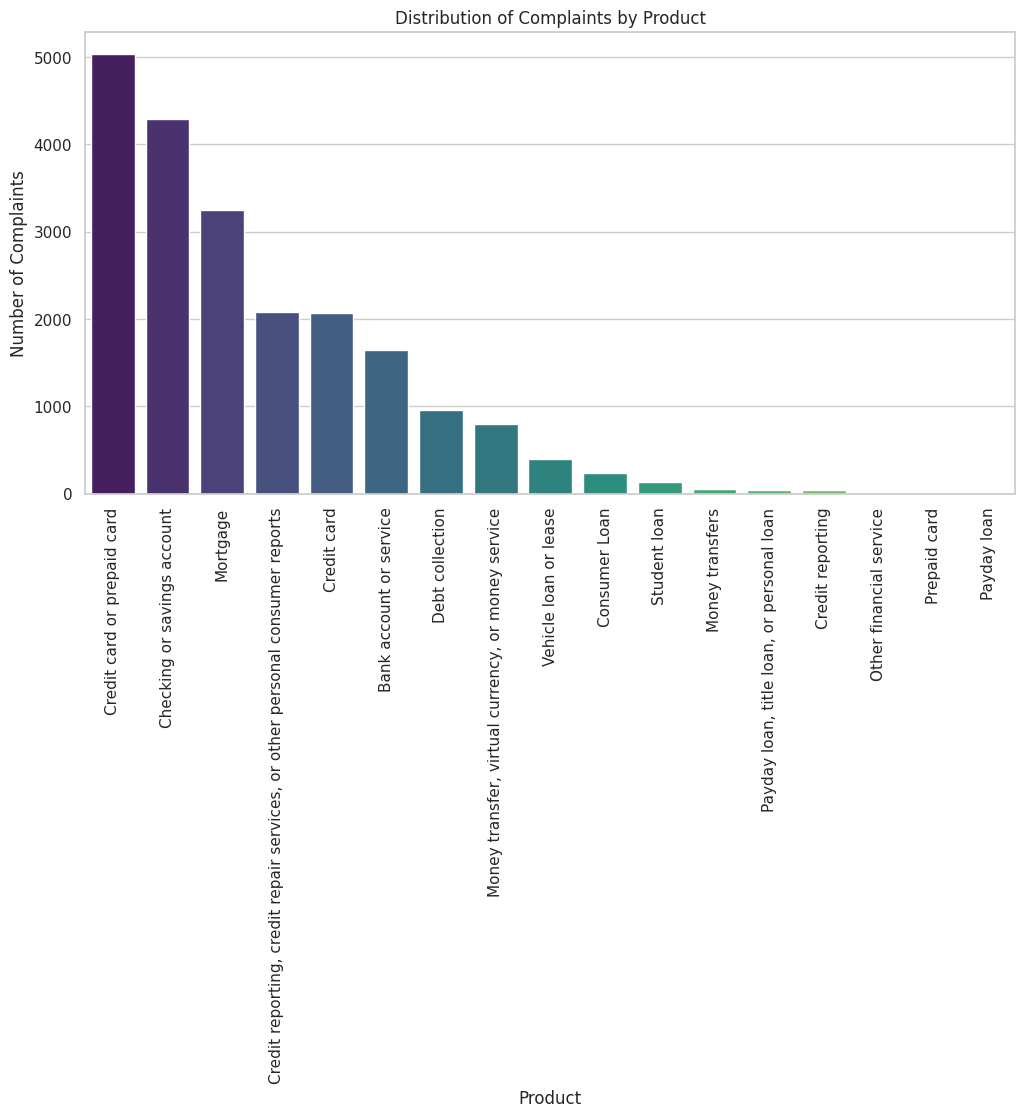

In [43]:
product_counts = df['product'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Distribution of Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.show()

**Top 10 States with the Highest Complaints**

<ipython-input-44-5c5e3e0ecec5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.head(10).index, y=state_counts.head(10).values, palette="magma")


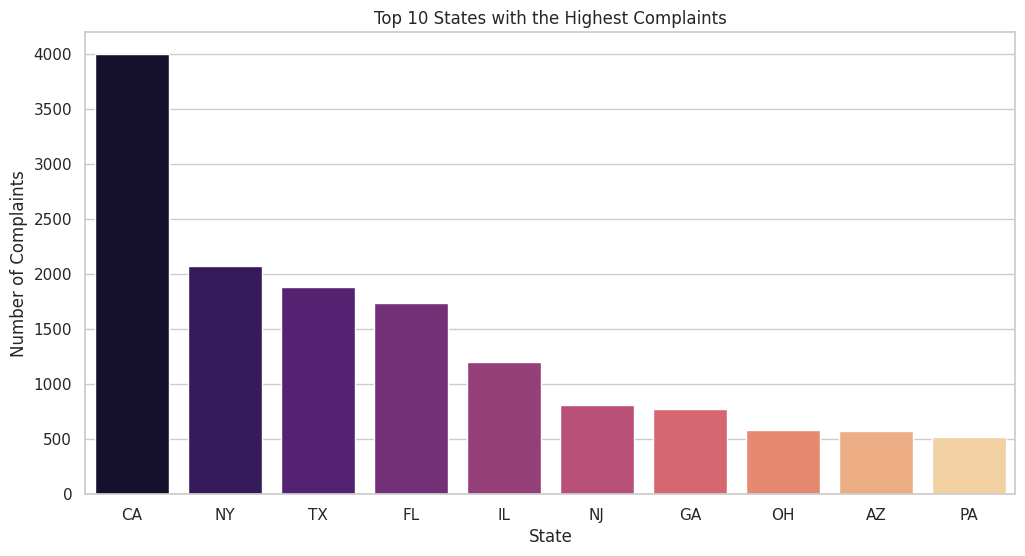

In [44]:
state_counts = df['state'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.head(10).index, y=state_counts.head(10).values, palette="magma")
plt.title('Top 10 States with the Highest Complaints')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.show()


**Top 10 Most Common Complaint Issues**

<ipython-input-45-27dc6aa69522>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issue_counts.head(10).index, y=issue_counts.head(10).values, palette="coolwarm")


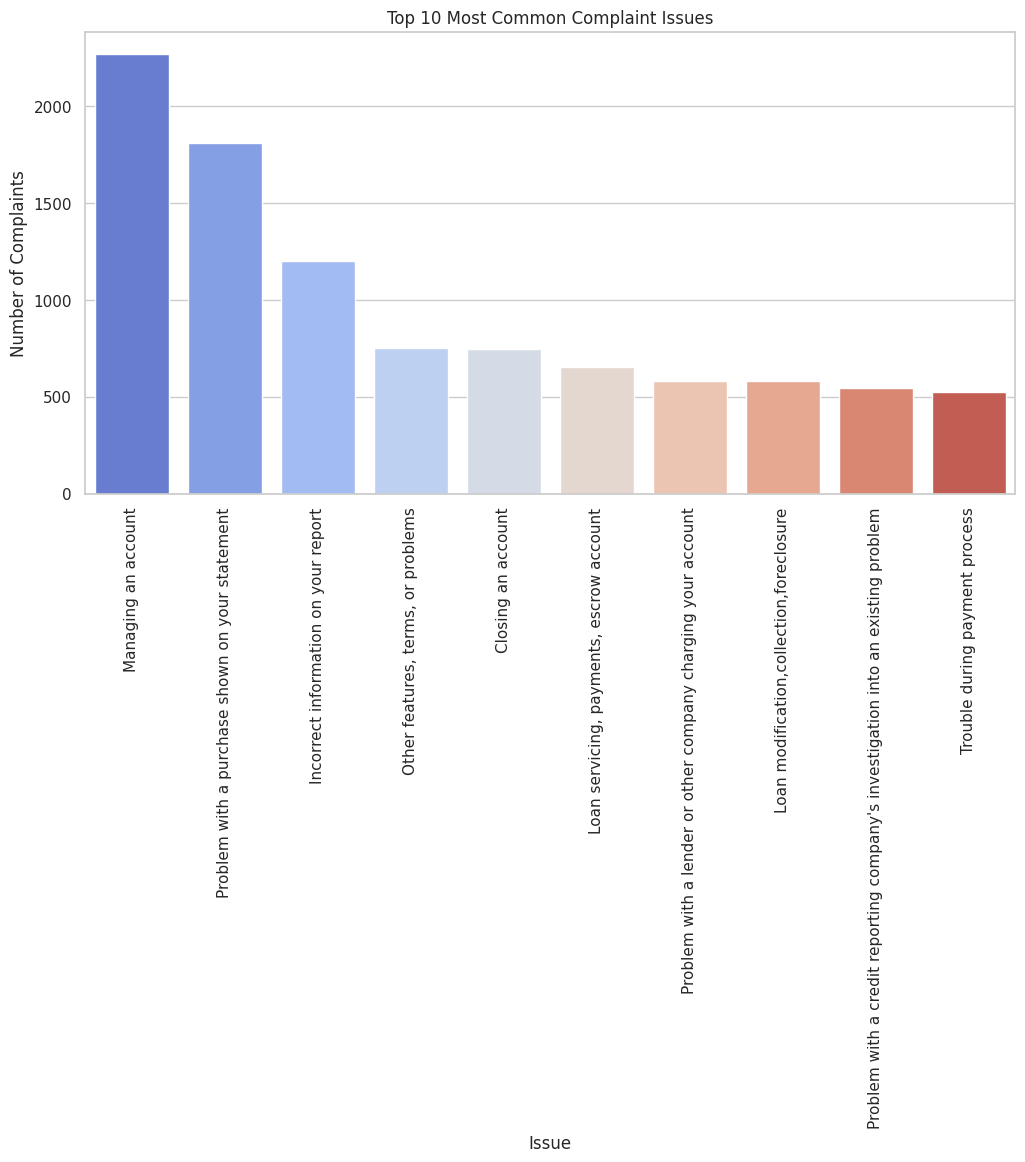

In [45]:
issue_counts = df['issue'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=issue_counts.head(10).index, y=issue_counts.head(10).values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Top 10 Most Common Complaint Issues')
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.show()

**Distribution of Complaint Lengths**

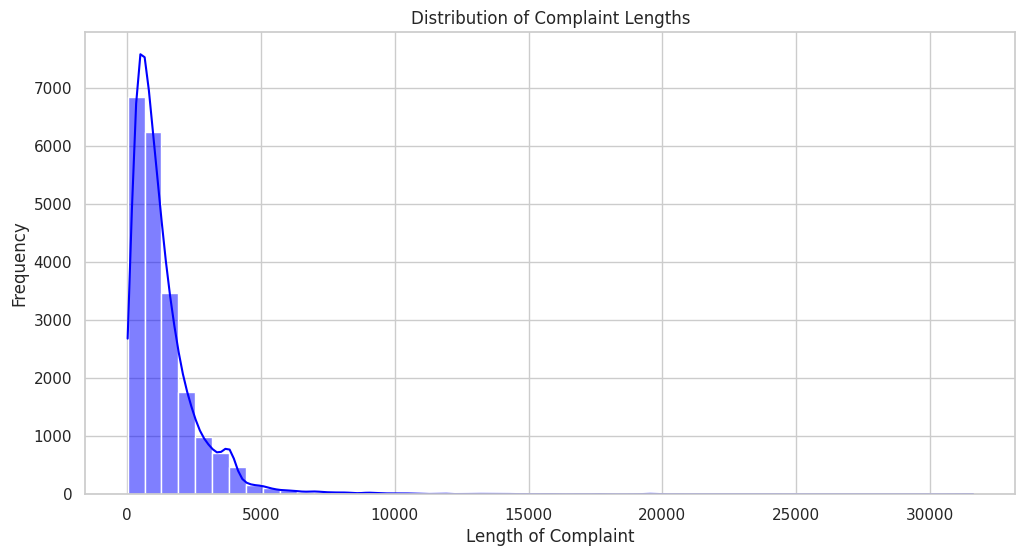

In [46]:
df['complaint_length'] = df['complaint_what_happened'].str.len()
plt.figure(figsize=(12, 6))
sns.histplot(df['complaint_length'], bins=50, kde=True, color="blue")
plt.title('Distribution of Complaint Lengths')
plt.xlabel('Length of Complaint')
plt.ylabel('Frequency')
plt.show()


**Distribution of Timely Responses**

<ipython-input-47-8887b2b9541b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=timely_counts.index, y=timely_counts.values, palette="pastel")


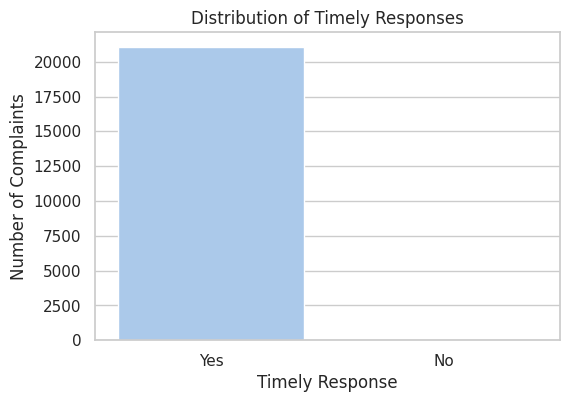

In [47]:
timely_counts = df['timely'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=timely_counts.index, y=timely_counts.values, palette="pastel")
plt.title('Distribution of Timely Responses')
plt.xlabel('Timely Response')
plt.ylabel('Number of Complaints')
plt.show()


In [48]:
df.columns

Index(['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided',
       'complaint_POS_removed', 'category', 'complaint_length'],
      dtype='object')

**Visualising the categories**

Category Distribution:
category
Credit card / Prepaid card    7116
Bank account services         5940
Mortgages/loans               4030
Theft/Dispute reporting       3839
Others                         147
Name: count, dtype: int64


<ipython-input-49-93bbb2a875f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


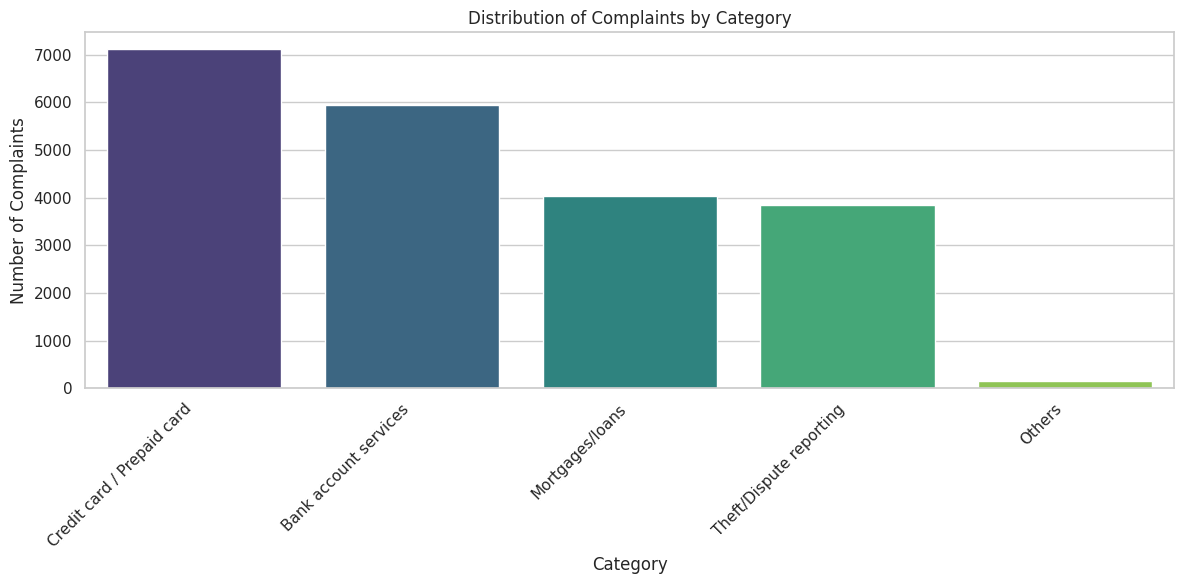

In [49]:
category_counts = df['category'].value_counts()
print("Category Distribution:")
print(category_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Distribution of Complaints by Category')
plt.xlabel('Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top issues in each category**

In [50]:
for cat in df['category'].unique():
    print(f"\nTop Issues in Category: {cat}")
    print(df[df['category'] == cat]['issue'].value_counts().head(5))



Top Issues in Category: Theft/Dispute reporting
issue
Incorrect information on your report                                                1050
Improper use of your report                                                          471
Problem with a credit reporting company's investigation into an existing problem     458
Fraud or scam                                                                        431
Attempts to collect debt not owed                                                    255
Name: count, dtype: int64

Top Issues in Category: Credit card / Prepaid card
issue
Problem with a purchase shown on your statement    1808
Other features, terms, or problems                  753
Closing your account                                524
Fees or interest                                    483
Getting a credit card                               389
Name: count, dtype: int64

Top Issues in Category: Bank account services
issue
Managing an account                                      

**Text Length Distribution by Category**

<ipython-input-51-896cc6582e81>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='complaint_length', data=df, palette="Set3")


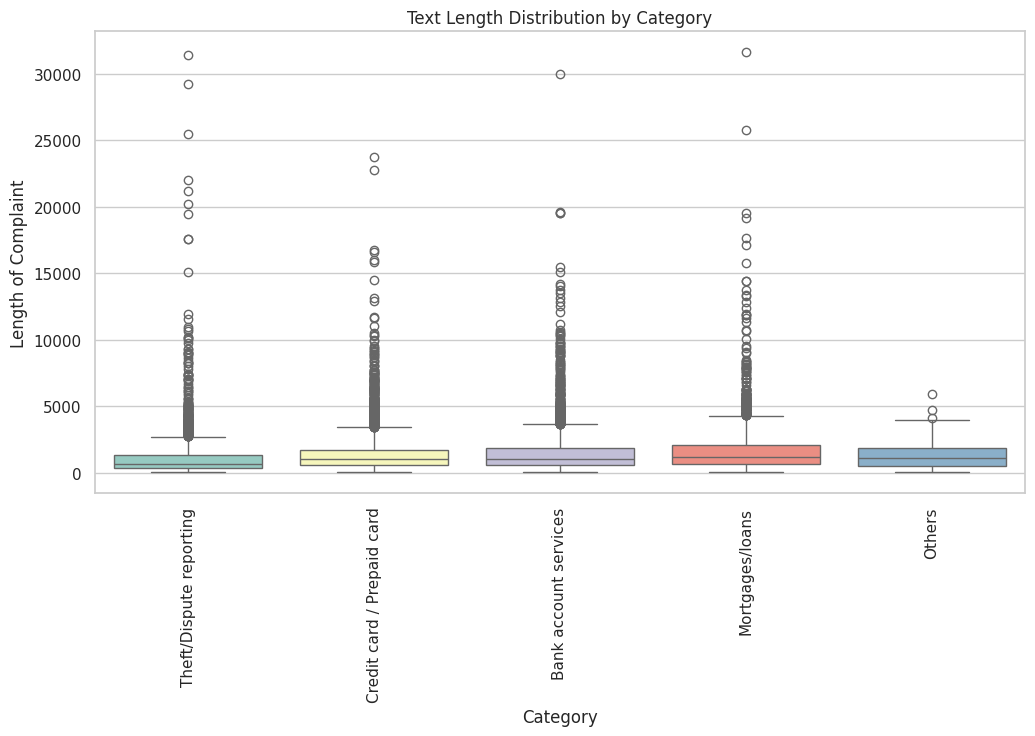

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='complaint_length', data=df, palette="Set3")
plt.title('Text Length Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Length of Complaint')
plt.xticks(rotation=90)
plt.show()

**Timely Response Percentage by Category**

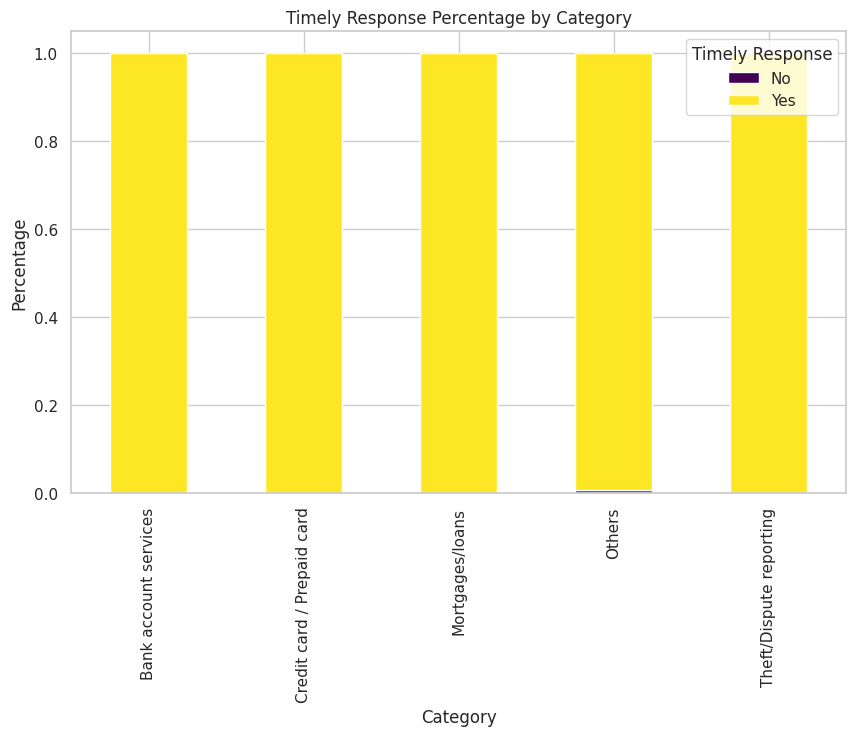

In [52]:
timely_counts = df.groupby('category')['timely'].value_counts(normalize=True).unstack()
timely_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Timely Response Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Timely Response', loc='upper right')
plt.show()

In [4]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
Tesla T4


In [5]:
!pip install transformers
!pip install torch
!pip install spacy
!pip install textblob
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
df.columns = ['index', 'type', 'id', 'score', 'tags', 'zip_code','complaint_id', 'issue', 'date_received',
              'state', 'consumer_disputed', 'product','company_response', 'company', 'submitted_via',
              'date_sent_to_company', 'company_public_response','sub_product', 'timely',
              'complaint_what_happened', 'sub_issue','consumer_consent_provided']


**Pre-processing**

In [7]:
import numpy as np
df[df.loc[:, 'complaint_what_happened'] == ''] = np.nan
df = df[~df['complaint_what_happened'].isnull()]
df['complaint_what_happened'] = df['complaint_what_happened'].astype(str)


<ipython-input-7-c48b0ab8ada0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complaint_what_happened'] = df['complaint_what_happened'].astype(str)


In [8]:
import re
def clean_text(sent):
    sent = sent.lower()
    sent = re.sub(r'[^\w\s]', '', sent)
    sent = re.sub(r'\w*\d\w*', '', sent)
    return sent

df_clean = pd.DataFrame(df['complaint_what_happened'].apply(clean_text))


In [9]:
df_clean

,complaint_what_happened
1,good morning my name is xxxx xxxx and i apprec...
2,i upgraded my xxxx xxxx card in and was told ...
10,chase card was reported on however fraudulent...
11,on while trying to book a xxxx xxxx ticket ...
14,my grand son give me check for i deposit it i...
...,...
78303,after being a chase card customer for well ove...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...
78310,i am not familiar with xxxx pay and did not un...
78311,i have had flawless credit for yrs ive had ch...


**Lemmatization**

In [10]:
import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

df_clean['complaint_lemmatized'] = df_clean['complaint_what_happened'].apply(lemmatize_text)


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
!pip install textblob


**POS Tagging**

In [22]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('conll2000')
nltk.download('movie_reviews')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [23]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [24]:
import nltk
nltk.data.path.append('/root/nltk_data')


In [25]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 91.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
import spacy
nlp = spacy.load('en_core_web_sm')

def get_POS_tags(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if token.pos_ == 'NOUN'])

df_clean['complaint_POS_removed'] = df_clean['complaint_lemmatized'].apply(get_POS_tags)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [27]:
df_clean

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank service ask debt verifi...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,xxxx card agent anniversary date agent informa...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,chase card report application identity consent...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,xxxx xxxx ticket offer ticket reward card info...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank account mone...
...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,xxxx credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,xxxx risk consumer chase bank app chase year b...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs chase credit card chase freedom pro...


In [16]:

!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [28]:
#adding clean data back to the main dataframe
df['complaint_POS_removed'] = df_clean['complaint_POS_removed']

**Mapping categories for classification**

In [29]:
def map_category(row):
    product = row['product']
    if product in ["Credit card or prepaid card", "Credit card", "Prepaid card"]:
        return "Credit card / Prepaid card"
    elif product in ["Checking or savings account", "Bank account or service"]:
        return "Bank account services"
    elif product in ["Debt collection", "Money transfer, virtual currency, or money service",
                     "Credit reporting, credit repair services, or other personal consumer reports"]:
        return "Theft/Dispute reporting"
    elif product in ["Mortgage", "Student loan", "Vehicle loan or lease", "Payday loan", "Consumer Loan"]:
        return "Mortgages/loans"
    else:
        return "Others"

df['category'] = df.apply(map_category, axis=1)

**Splitting the data into training**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['complaint_POS_removed'], df['category'], test_size=0.2, random_state=42
)

In [31]:
#tokenizing the data
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(texts):
    return tokenizer(
        texts.tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt'
    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [32]:
train_encodings = tokenize_data(X_train)
test_encodings = tokenize_data(X_test)


In [33]:
import torch
train_labels = torch.tensor(y_train.map({
    "Credit card / Prepaid card": 0,
    "Bank account services": 1,
    "Theft/Dispute reporting": 2,
    "Mortgages/loans": 3,
    "Others": 4
}).values)

test_labels = torch.tensor(y_test.map({
    "Credit card / Prepaid card": 0,
    "Bank account services": 1,
    "Theft/Dispute reporting": 2,
    "Mortgages/loans": 3,
    "Others": 4
}).values)

In [34]:
from torch.utils.data import DataLoader, Dataset


In [35]:
class ComplaintsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}, self.labels[idx]

train_dataset = ComplaintsDataset(train_encodings, train_labels)
test_dataset = ComplaintsDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


**Loading the BERT Model**

In [36]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
#training
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
from tqdm import tqdm


In [38]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = CrossEntropyLoss()

In [39]:
for epoch in range(3):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        inputs = {key: val.to(device) for key, val in batch[0].items()}
        labels = batch[1].to(device)

        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")

100%|██████████| 1054/1054 [06:02<00:00,  2.91it/s]


Epoch 1, Loss: 687.6088


100%|██████████| 1054/1054 [06:05<00:00,  2.88it/s]


Epoch 2, Loss: 532.8270


100%|██████████| 1054/1054 [06:05<00:00,  2.88it/s]

Epoch 3, Loss: 449.8711


**Model evaluation**

In [40]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        inputs = {key: val.to(device) for key, val in batch[0].items()}
        labels = batch[1].to(device)

        # Forward pass
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=1)

        # Calculate accuracy
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct / total:.2f}")


Test Accuracy: 0.80


In [41]:
from sklearn.metrics import classification_report

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        inputs = {key: val.to(device) for key, val in batch[0].items()}
        labels = batch[1].to(device)

        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

#generating the classification report
print(classification_report(all_labels, all_preds, target_names=[
    "Credit card / Prepaid card",
    "Bank account services",
    "Theft/Dispute reporting",
    "Mortgages/loans",
    "Others"
]))


                            precision    recall  f1-score   support

Credit card / Prepaid card       0.84      0.86      0.85      1459
     Bank account services       0.85      0.83      0.84      1184
   Theft/Dispute reporting       0.58      0.68      0.62       772
           Mortgages/loans       0.92      0.79      0.85       776
                    Others       0.00      0.00      0.00        24

                  accuracy                           0.80      4215
                 macro avg       0.64      0.63      0.63      4215
              weighted avg       0.81      0.80      0.80      4215



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
